In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv(r"D:\PROJECT\sites\ENF\US-Ho1\monthly_ho1.csv")
df.replace(-9990, np.nan, inplace=True)

latent_heat_of_vaporization = 2.45*10**6  # MJ/kg
df['ET_eddy_cov'] = df['LE']*1000 / latent_heat_of_vaporization
df.to_csv( r"D:\PROJECT\sites\ENF\US-Ho1\monthly_ho1.csv", index=False)
file_path=r"D:\PROJECT\sites\ENF\US-Ho1\monthly_ho1.csv"

In [3]:
# Initial cell: Define the years and colors for the plot
wet_year = 2008
drought_year = 2012
normal_year = 2017

# Define a dictionary to map each year to its corresponding color
year_colors = {
    wet_year: 'darkblue',
    drought_year: 'darkred',
    normal_year: 'darkgreen'
}


In [5]:
df.replace(-9990, np.nan, inplace=True)

df['Net Radiation']= df['SW_IN']-df['SW_OUT']+df['LW_IN']-df['LW_OUT']
df['Rn'] = df['Net Radiation'] * 0.0864  # conversion to MJ/m² day
df['gamma'] = 0.000665 * df['PRE']# psychrometric coefficient or gamma
df['es'] = 0.6108 * np.exp((17.27 * df['TEMP']) / (df['TEMP'] + 237.3))
df['delta'] = (4098 * df['es']) / ((df['TEMP'] + 273.3) ** 2)# delta
#df['ea'] = df['es'] * df['RH'] / 100
df['rho_a']= df['PRE']/((df['TEMP']+273.3)*287.05)
df['Bowen_ratio']=df['H']/df['LE']
df['Ga']=df['USTAR']**2/df['WINDSPEED']
df['Cp']= 1.005*1000

# canopy conductance
df['Gc'] = 1 / ( (df['rho_a'] * df['Cp'] * df['VPD']) / (df['gamma'] * df['LE']*1000) +
                ( (df['delta'] / df['gamma']) ** (df['Bowen_ratio'] - 1) ) / df['Ga'] )
df.to_csv(file_path , index=False)

# decoupling coeff
df['decoupling_coef'] = (1 +( df['delta'] / df['gamma'])) / (1 + (df['delta'] / df['gamma']) + (df['Ga'] / df['Gc']))
df.to_csv(file_path , index=False)


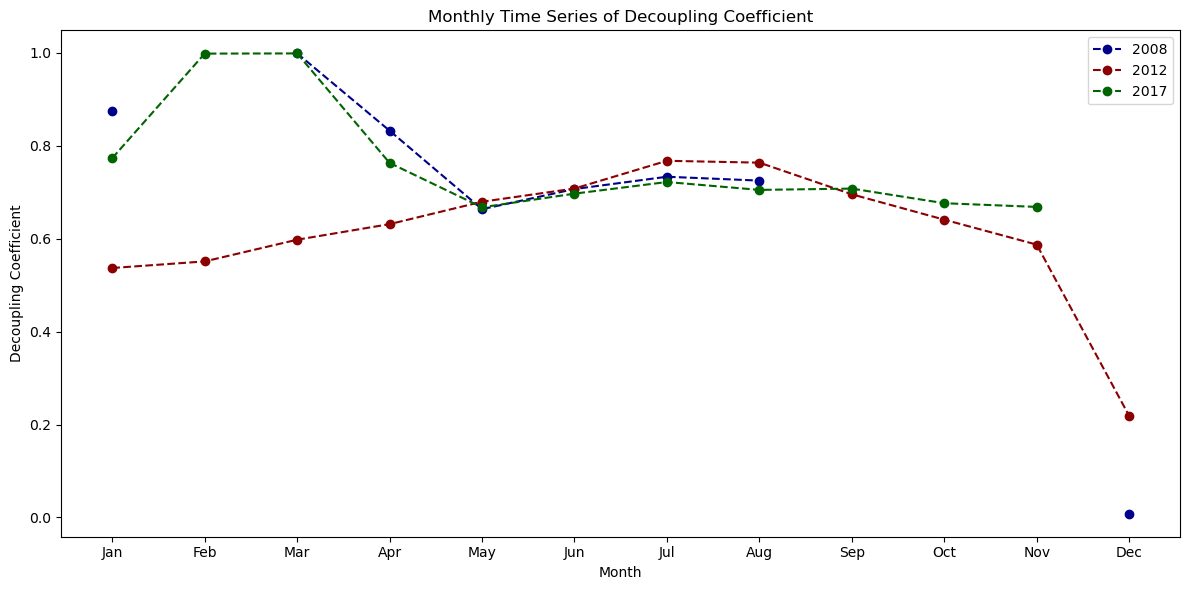

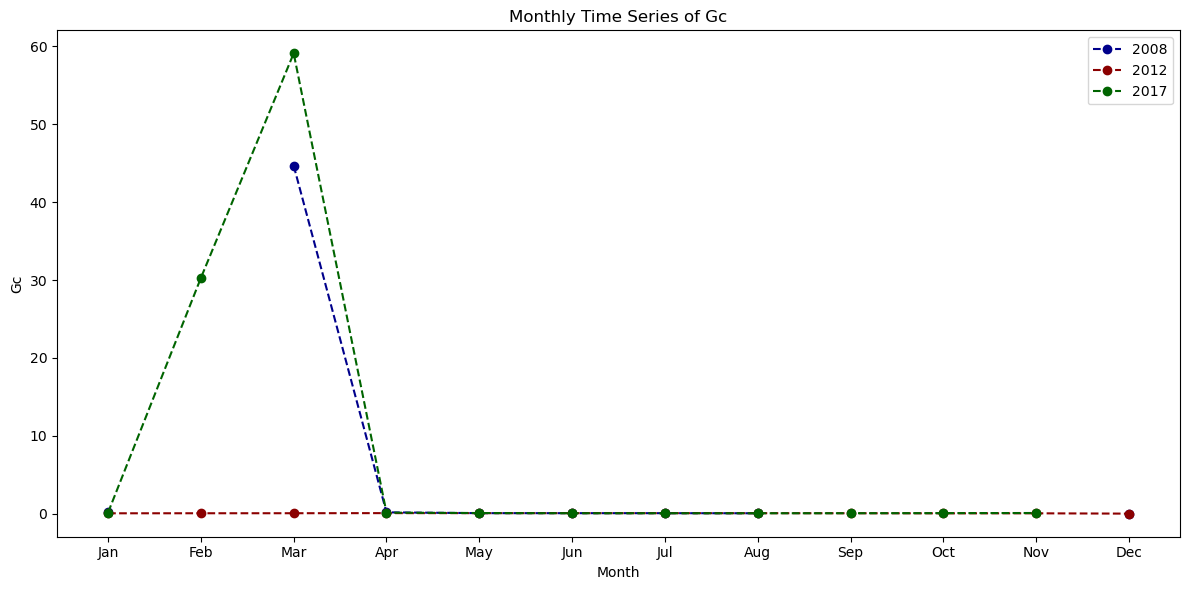

In [6]:
monthly_means = df.groupby(['Year', 'Month'])[['decoupling_coef', 'Gc']].mean().reset_index()
filtered_data = monthly_means[monthly_means['Year'].isin([wet_year, drought_year, normal_year])]
year_colors = {wet_year: 'darkblue', drought_year: 'darkred', normal_year: 'darkgreen'}

plt.figure(figsize=(12, 6))
for year in [wet_year, drought_year, normal_year]:
    year_data = filtered_data[filtered_data['Year'] == year]
    plt.plot(year_data['Month'], year_data['decoupling_coef'], label=f'{year}', color=year_colors[year], linestyle='--', marker='o')
plt.title('Monthly Time Series of Decoupling Coefficient')
plt.ylabel('Decoupling Coefficient')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for year in [wet_year, drought_year, normal_year]:
    year_data = filtered_data[filtered_data['Year'] == year]
    plt.plot(year_data['Month'], year_data['Gc'], label=f'{year}', color=year_colors[year], linestyle='--', marker='o')
plt.title('Monthly Time Series of Gc')
plt.ylabel('Gc')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()
